# kmeans clustering (online retail)

In [1]:
# imports for eda
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# imports for clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# imports for feature scaling
from sklearn.preprocessing import StandardScaler

# exploratory data analysis

In [2]:
# load the dataset
df= pd.read_excel("C:\\kmeans clustering\\online_retail.xlsx",sheet_name= 0)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [98]:
df.describe(include= "O")

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [99]:
df[df["Customer ID"].isnull()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


In [100]:
df[df.Quantity < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [101]:
# use regular expression
df["Invoice"]= df.Invoice.astype(str)
df[df.Invoice.str.match("^\\d{6}$") == False]["Invoice"]

178       C489449
179       C489449
180       C489449
181       C489449
182       C489449
           ...   
524695    C538123
524696    C538124
524697    C538124
524698    C538124
525282    C538164
Name: Invoice, Length: 10209, dtype: object

In [102]:
df.Invoice.str.replace("[0-9]","",regex= True).unique()

array(['', 'C', 'A'], dtype=object)

In [103]:
df[df.Invoice.str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [104]:
df["StockCode"]= df.StockCode.astype(str)
df[(df.StockCode.str.match("^\\d{5}$") == False) & (df.StockCode.str.match("^\\d{5}[a-zA-Z]+$")== False)]["StockCode"]

89        POST
126       POST
173       POST
625       POST
735          D
          ... 
524776       M
524887     DOT
525000     DOT
525126     DOT
525147     DOT
Name: StockCode, Length: 3098, dtype: object

In [105]:
df.StockCode.unique()

array(['85048', '79323P', '79323W', ..., '22935', '22933', '21120'],
      dtype=object)

# data cleaning

In [106]:
# create a copy of the dataset for data cleaning
cleaned_df= df.copy()

In [107]:
cleaned_df["Invoice"]= cleaned_df.Invoice.astype(str)
mask= cleaned_df["Invoice"].str.match("^\\d{6}$") == True
cleaned_df= cleaned_df[mask]

In [108]:
# "|" here refers to "or"
cleaned_df["StockCode"]= cleaned_df["StockCode"].astype(str)
mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df["StockCode"].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]


In [109]:
cleaned_df.dropna(subset= "Customer ID",inplace= True)

In [110]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000000,406337,406337.000000,406337.000000
mean,13.619099,2010-07-01 10:11:06.543288320,2.991462,15373.632992
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000659,NaN,4.285876,1677.365907


In [111]:
cleaned_df[cleaned_df.Price ==0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.0,15070.0,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.0,18071.0,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.0,14258.0,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.0,12417.0,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.0,16858.0,United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.0,13047.0,United Kingdom


In [112]:
# for this process we are only going to consider values for positive integer prices
clean_df= cleaned_df[cleaned_df.Price > 0]

# feature engineering

In [113]:
clean_df["sales"]= clean_df.Quantity * clean_df.Price
#clean_df

C:\Users\WINDOWS 11-23H2\AppData\Local\Temp\ipykernel_2132\1549453601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["sales"]= clean_df.Quantity * clean_df.Price


In [114]:
# create an aggregated dataframe using group by
aggregated_df= clean_df.groupby("Customer ID",as_index= False) \
    .agg(MonetaryValue= ("sales","sum"),
        Frequency= ("Invoice","nunique"),
        LastInvoiceDate= ("InvoiceDate","max"))

In [115]:
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


In [116]:
# in datetime format oldest format max() means oldest
maximum_invoice_date= aggregated_df["LastInvoiceDate"].max() # this gives the oldest invoice date
aggregated_df["recency"]= (maximum_invoice_date - aggregated_df.LastInvoiceDate).dt.days

In [117]:
graph_col= ["MonetaryValue","Frequency","recency"]

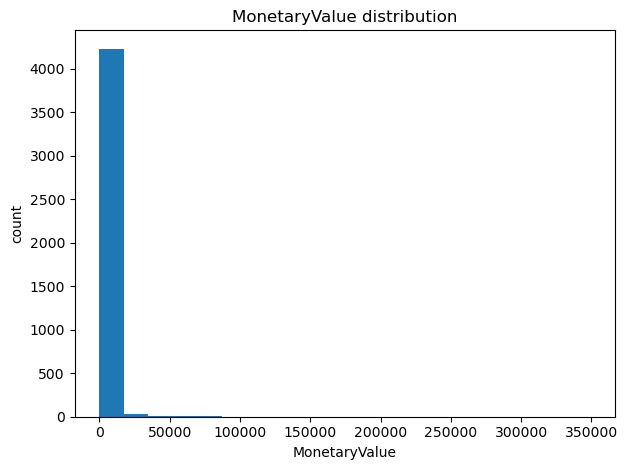

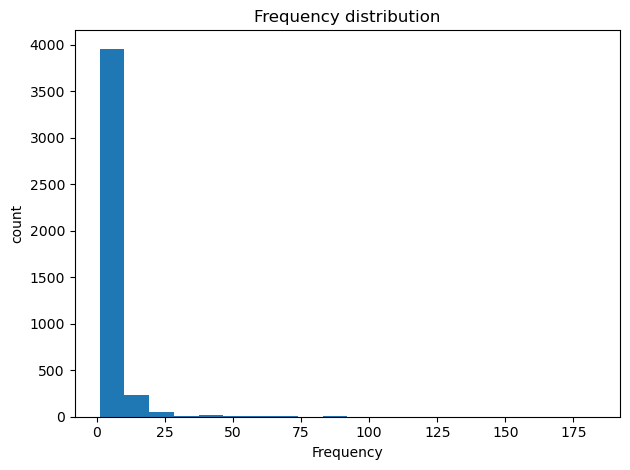

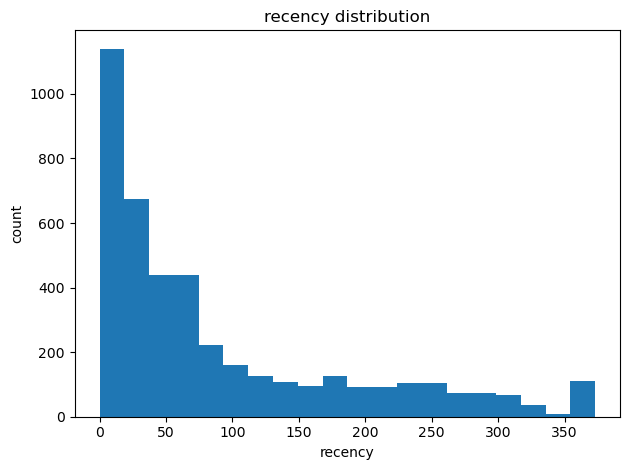

In [118]:
# plot the graph column
for feature in graph_col:
    plt.figure()
    plt.hist(aggregated_df[feature],bins= 20)
    plt.title(feature +" " + "distribution")
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.tight_layout()

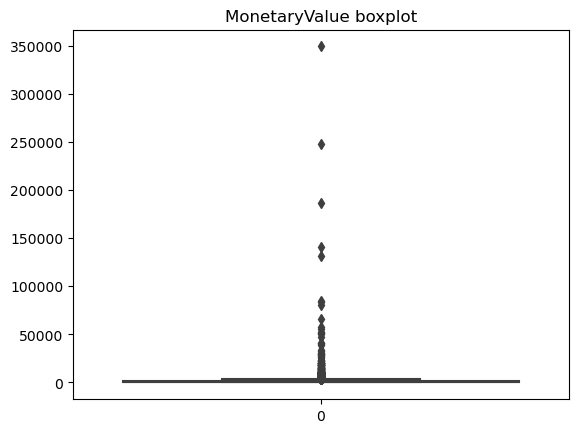

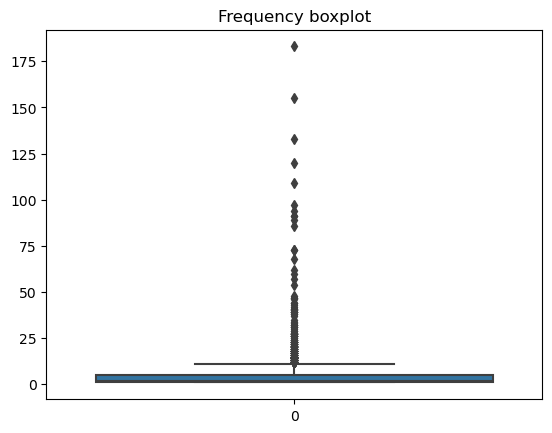

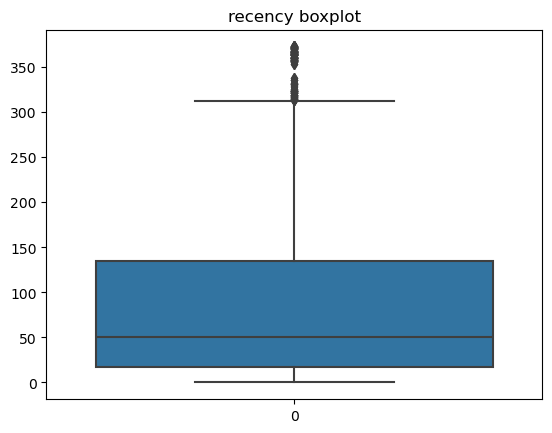

In [119]:
for feature in graph_col:
    plt.figure()
    sns.boxplot(aggregated_df[feature])
    plt.title(feature + " " + "boxplot")

In [120]:
# remove outliers from the data
mon_val_q1= aggregated_df.MonetaryValue.quantile(0.25)
mon_val_q3= aggregated_df.MonetaryValue.quantile(0.75)
inter_quartile_range= mon_val_q3 - mon_val_q1

In [121]:
monetary_outliers= aggregated_df[(aggregated_df.MonetaryValue > (mon_val_q3 + 1.5 * inter_quartile_range)) | (aggregated_df.MonetaryValue < (mon_val_q1 - 1.5 * inter_quartile_range))].copy()
monetary_outliers.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,recency
count,423.000000,423.000000,423.000000,423,423.000000
mean,15103.040189,12188.101740,17.167849,2010-11-09 12:26:02.978723328,30.035461
min,12357.000000,3802.040000,1.000000,2009-12-10 18:03:00,0.000000
25%,13622.000000,4605.940000,8.000000,2010-11-08 13:17:30,3.000000
50%,14961.000000,6191.320000,12.000000,2010-11-26 12:19:00,13.000000
75%,16692.000000,10273.235000,18.000000,2010-12-06 10:34:30,31.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,364.000000
std,1728.661406,25830.851045,19.729755,NaN,51.541004


In [122]:
freq_q1= aggregated_df.Frequency.quantile(0.25)
freq_q3= aggregated_df.Frequency.quantile(0.75)
freq_inter_quartile_range= freq_q3-freq_q1

In [123]:
frequency_outliers= aggregated_df[(aggregated_df.Frequency > (freq_q3 + 1.5 * freq_inter_quartile_range)) | (aggregated_df.Frequency < (freq_q1 - 1.5 * freq_inter_quartile_range))].copy()
frequency_outliers.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,recency
count,279.000000,279.000000,279.000000,279,279.000000
mean,15352.655914,14409.714932,23.810036,2010-11-23 11:06:20.645161216,16.089606
min,12437.000000,1094.390000,12.000000,2010-05-12 16:51:00,0.000000
25%,13800.000000,4331.560500,13.000000,2010-11-20 13:14:30,2.000000
50%,15465.000000,6615.770000,17.000000,2010-12-02 10:46:00,7.000000
75%,16828.500000,11692.405000,23.000000,2010-12-07 11:08:30,19.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,211.000000
std,1748.429987,31381.736785,21.932937,NaN,26.589117


In [125]:
no_outliers= aggregated_df[(~aggregated_df.index.isin(monetary_outliers.index)) & (~aggregated_df.index.isin(frequency_outliers.index))]

no_outliers.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,recency
count,3809.000000,3809.000000,3809.000000,3809,3809.000000
mean,15376.482804,885.502197,2.863481,2010-09-03 11:16:46.516146176,97.082174
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13912.000000,279.910000,1.000000,2010-07-08 14:48:00,22.000000
50%,15389.000000,588.050000,2.000000,2010-10-12 16:25:00,58.000000
75%,16854.000000,1269.050000,4.000000,2010-11-17 13:14:00,154.000000
max,18287.000000,3788.210000,11.000000,2010-12-09 20:01:00,373.000000
std,1693.199806,817.672283,2.243748,NaN,98.111495


In [126]:
graph_col

['MonetaryValue', 'Frequency', 'recency']

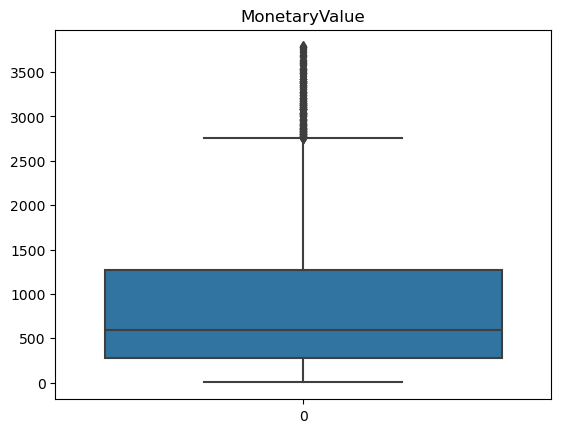

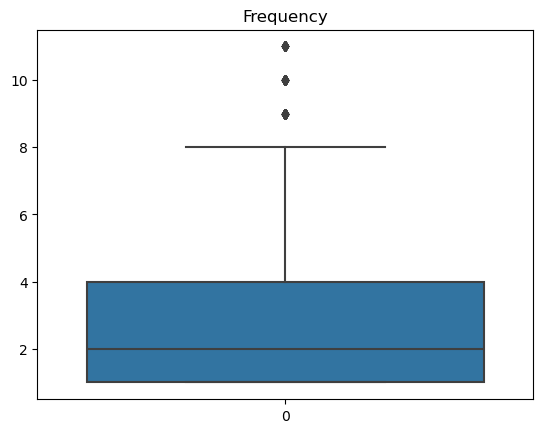

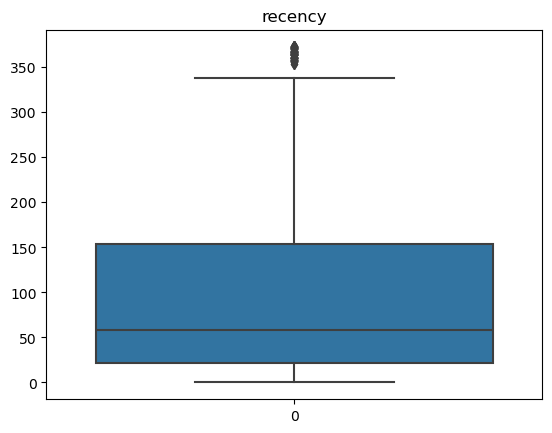

In [127]:
for feature in graph_col:
    plt.figure()
    sns.boxplot(data= no_outliers[feature])
    plt.title(feature)

Text(0.5, 0.92, '3D Scatter Plot of Customer Data')

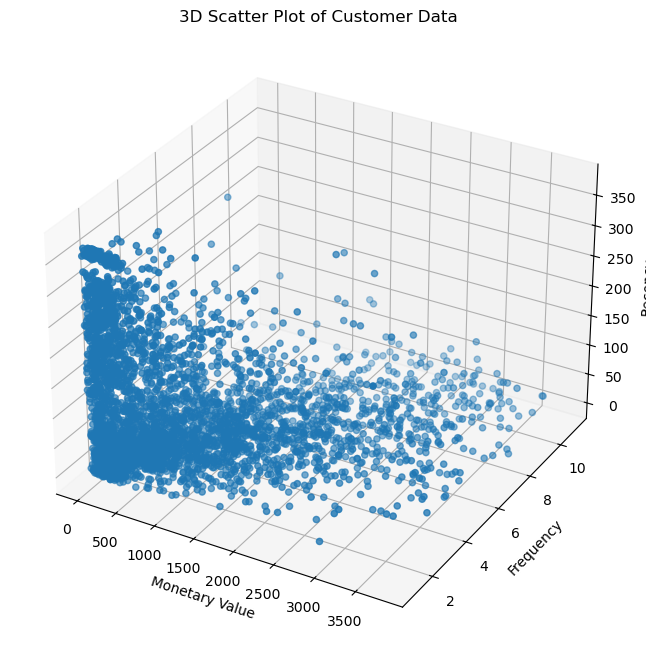

In [128]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(no_outliers["MonetaryValue"], no_outliers["Frequency"], no_outliers["recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

# feature scaling(standardization)



In [129]:
# convert the values into z-scores 
# z= (value-mean)/std
S_scaler= StandardScaler()
scaled_data= S_scaler.fit_transform(no_outliers[["MonetaryValue", "Frequency", "recency"]])

In [130]:
scaled_df= pd.DataFrame(scaled_data,index= no_outliers.index,columns= ("MonetaryValue", "Frequency", "recency"))
scaled_df

,MonetaryValue,Frequency,recency
0,-0.875945,-0.384889,0.682149
1,0.535514,-0.384889,-0.969251
2,-0.812586,-0.830631,-0.245489
3,1.633678,-0.384889,-0.561498
4,-0.715016,-0.830631,-0.887700
...,...,...,...
4280,-0.298120,1.398076,-0.816344
4281,-0.579553,-0.830631,-0.316846
4282,-0.621972,-0.830631,2.017539
4283,0.441467,-0.384889,0.141876


Text(0.5, 0.92, 'monetary value: freq')

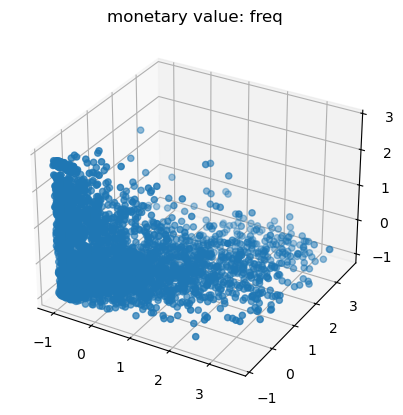

In [131]:
fig= plt.figure()
ax= fig.add_subplot(projection= "3d")
ax.scatter(scaled_df.MonetaryValue,scaled_df.Frequency,scaled_df.recency)
plt.title("monetary value: freq")

# KMeans Clustering

In [132]:
max_k_value= 12
inertia= []
silhouette_scores= []
k_values= range(2,max_k_value +1)
for k in k_values:
    kmeans= KMeans(n_clusters= k,max_iter= 1000)
    cluster_labels= kmeans.fit_predict(scaled_df)
    efficiency_score= silhouette_score(scaled_df,cluster_labels)
    silhouette_scores.append(efficiency_score)
    inertia.append(kmeans.inertia_)

C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\WINDOWS

In [133]:
### silhouette score is a performance index for the quality of a cluster
# it rqnges from -1 to 1 (the more the better)
### inertia is another index for the goodness of the cluster(lower the better)

Text(0.5, 1.0, 'inertia score per kclusters')

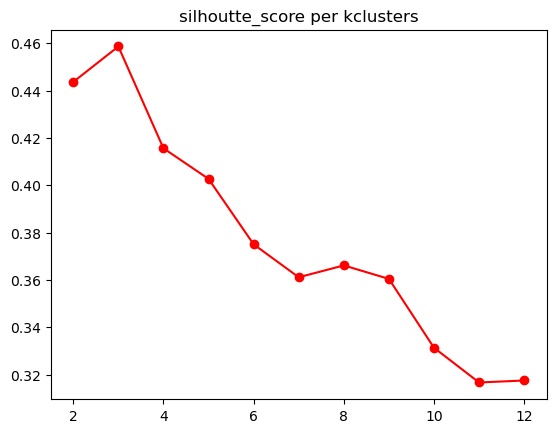

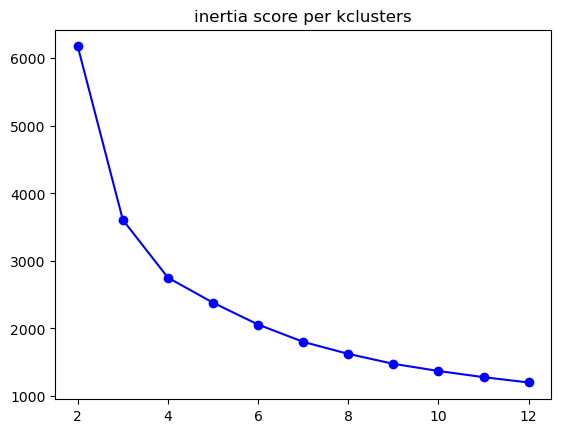

In [134]:
# we will use the elbow method to select the best cluster number
plt.figure()
plt.plot(k_values,silhouette_scores,marker= "o",color= "red")
plt.title("silhoutte_score per kclusters")
plt.figure()
plt.plot(k_values,inertia,marker= "o",color= "blue")
plt.title("inertia score per kclusters")



In [135]:
kmeans_4= KMeans(n_clusters= 4,max_iter= 1000)
cluster_labels= kmeans_4.fit_predict(scaled_df)
cluster_labels

C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 3, 2, ..., 0, 3, 3])

In [136]:
no_outliers["cluster"]= cluster_labels

C:\Users\WINDOWS 11-23H2\AppData\Local\Temp\ipykernel_2132\295042090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers["cluster"]= cluster_labels


In [137]:
no_outliers.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,recency,cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,0
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,3
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,3
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2


In [138]:
# get a color scheme for the clusters
cluster_scheme= sns.color_palette(palette= "plasma",n_colors= no_outliers.cluster.nunique())

In [139]:
colors= no_outliers.cluster.map({0:cluster_scheme[0],
                                1:cluster_scheme[1],
                                2:cluster_scheme[2],
                                3:cluster_scheme[3]})

(0.0, 4000.0)

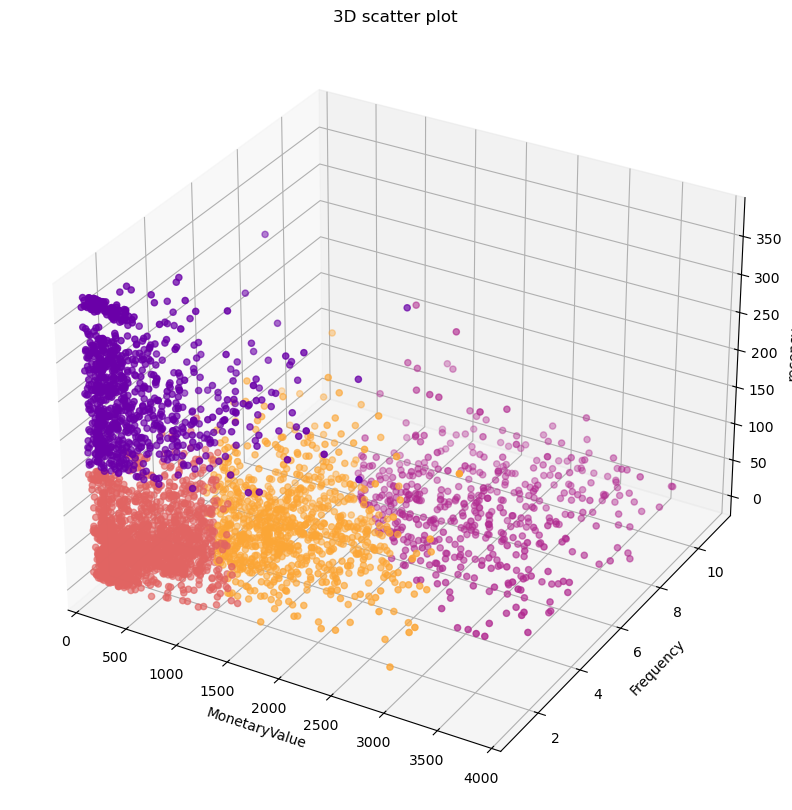

In [142]:
# visualize the given clusters on a 3d plot
fig= plt.figure(figsize= (10,10))
ax= fig.add_subplot(projection= "3d")
ax.scatter(data= no_outliers,xs= 'MonetaryValue',ys= 'Frequency',zs= 'recency',
          c= colors,marker= "o")
ax.set_xlabel("MonetaryValue")
ax.set_ylabel("Frequency")
ax.set_zlabel("recency")
ax.set_title("3D scatter plot")
ax.set_xlim(0,4000)

Text(0, 0.5, 'Recency')

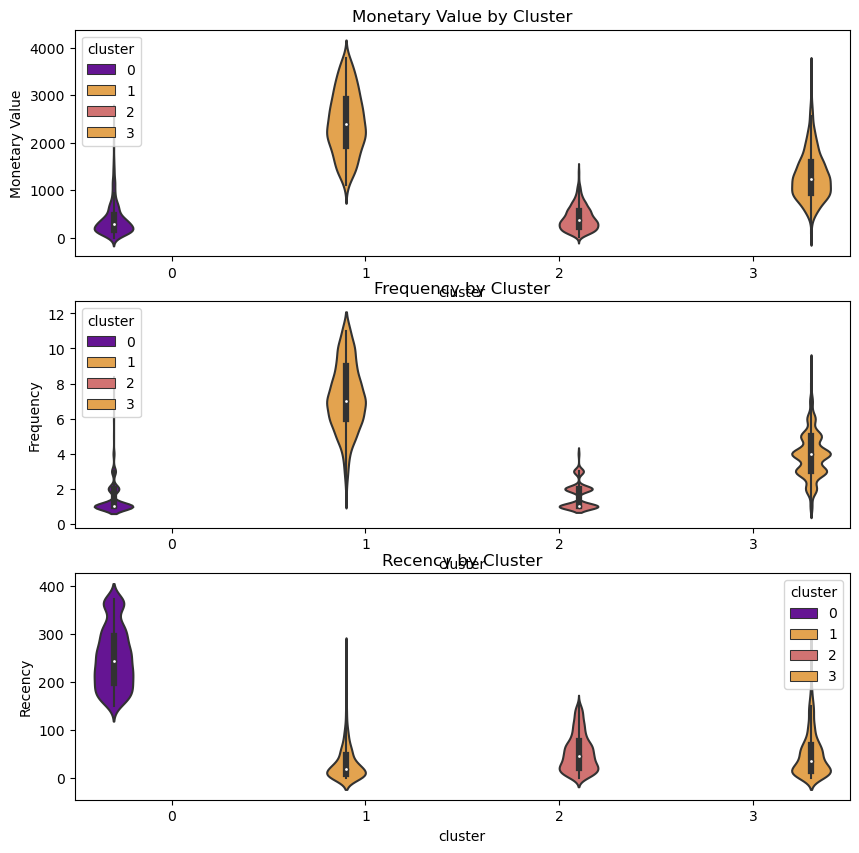

In [153]:
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
sns.violinplot(x=no_outliers['cluster'], y=no_outliers['MonetaryValue'], palette=colors, hue=no_outliers["cluster"])
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=no_outliers['cluster'], y=no_outliers['Frequency'], palette=colors, hue=no_outliers["cluster"])
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=no_outliers['cluster'], y=no_outliers['recency'], palette=colors, hue=no_outliers["cluster"])
plt.title('Recency by Cluster')
plt.ylabel('Recency')